In [1]:
!ls -lah 'Hijja2/'

total 16288
drwxr-xr-x  37 ahmedaljmiai  staff   1.2K 27 Oct 21:23 .
drwxr-xr-x   8 ahmedaljmiai  staff   256B 27 Oct 22:40 ..
drwxr-xr-x  12 ahmedaljmiai  staff   384B 27 Oct 13:48 .git
drwxr-xr-x   9 ahmedaljmiai  staff   288B 27 Oct 13:47 1 alif
drwxr-xr-x   4 ahmedaljmiai  staff   128B 27 Oct 13:47 10 ra
drwxr-xr-x   4 ahmedaljmiai  staff   128B 27 Oct 13:47 11 zay
drwxr-xr-x   6 ahmedaljmiai  staff   192B 27 Oct 13:47 12 sin
drwxr-xr-x   6 ahmedaljmiai  staff   192B 27 Oct 13:47 13 shin
drwxr-xr-x   6 ahmedaljmiai  staff   192B 27 Oct 13:47 14 sad
drwxr-xr-x   6 ahmedaljmiai  staff   192B 27 Oct 13:47 15 dad
drwxr-xr-x   6 ahmedaljmiai  staff   192B 27 Oct 13:47 16 da
drwxr-xr-x   6 ahmedaljmiai  staff   192B 27 Oct 13:47 17 za
drwxr-xr-x   6 ahmedaljmiai  staff   192B 27 Oct 13:47 18 ayn
drwxr-xr-x   6 ahmedaljmiai  staff   192B 27 Oct 13:47 19 gayn
drwxr-xr-x   6 ahmedaljmiai  staff   192B 27 Oct 13:47 2 ba
drwxr-xr-x   7 ahmedaljmiai  staff   224B 27 Oct 13:47 20 fa
drwxr-xr-x 

In [2]:
!ls -lah 'Hijja2/CSV'

total 198440
drwxr-xr-x@  6 ahmedaljmiai  staff   192B 27 Oct 21:23 .
drwxr-xr-x  37 ahmedaljmiai  staff   1.2K 27 Oct 21:23 ..
-rw-r--r--@  1 ahmedaljmiai  staff    19M 27 May  2019 X_test.csv
-rw-r--r--@  1 ahmedaljmiai  staff    77M 27 May  2019 X_train.csv
-rw-r--r--@  1 ahmedaljmiai  staff    34K 27 May  2019 y_test.csv
-rw-r--r--@  1 ahmedaljmiai  staff   136K 27 May  2019 y_train.csv


In [3]:
import pandas as pd
import cv2
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [4]:
img = cv2.imread('Hijja2/1 alif/1.6/10040.png')

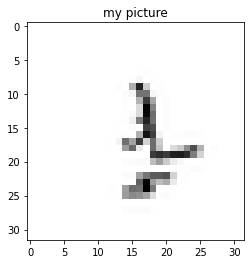

In [5]:
plt.imshow(img)
plt.title('my picture')
plt.show()

In [6]:
X_train = pd.read_csv('Hijja2/CSV/X_train.csv')
X_test = pd.read_csv('Hijja2/CSV/X_test.csv')

In [7]:
y_train = pd.read_csv('Hijja2/CSV/y_train.csv')
y_test = pd.read_csv('Hijja2/CSV/y_test.csv')

In [8]:
len(X_train.iloc[100].to_numpy())

1024

In [9]:
32*32

1024

In [10]:
y_train.iloc[33]

label    1
Name: 33, dtype: int64

In [11]:
im = X_train.iloc[33].to_numpy().reshape(32,32)

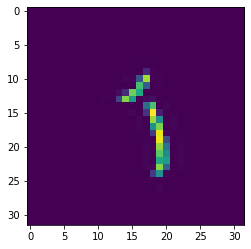

In [12]:
plt.imshow(im)

In [13]:
img = Image.fromarray((im).astype(np.uint8))

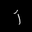

In [14]:
img

In [15]:
from sklearn.neighbors import KNeighborsClassifier


In [16]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [17]:
neigh.fit(X_train, y_train)

/Users/ahmedaljmiai/opt/anaconda3/envs/cv4py37r/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [22]:
b = neigh.predict(X_test[:100])

In [23]:
print(b)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  5  1  1  1  1  2  1  1  1  1  1  1  1  9  1  1
  1  1  1  1  1  1 23  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1
  1  1  1  1]


In [24]:
from sklearn import metrics

In [25]:
metrics.accuracy_score(y_test[:100], b)

0.95

In [26]:
metrics.confusion_matrix(y_test[:100], b)

array([[95,  2,  1,  1,  1],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

In [27]:
print(metrics.classification_report(y_test[:100], b))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97       100
           2       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         0

    accuracy                           0.95       100
   macro avg       0.20      0.19      0.19       100
weighted avg       1.00      0.95      0.97       100



/Users/ahmedaljmiai/opt/anaconda3/envs/cv4py37r/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
